About the Dataset:

id: unique id for a news article
title: the title of a news article
author: author of the news article
text: the text of the article; could be incomplete
label: a label that marks whether the news article is real or fake:
    1: Fake news
    0: real News

In [10]:
#importing the libraries to used
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [14]:
!pip install --upgrade nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 200.5 kB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [15]:
import nltk
nltk.download('stopwords')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/kali/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_23942/3889107961.py", line 1, in <module>
    import nltk
  File "/home/kali/anaconda3/lib/python3.10/site-packages/nltk/__init__.py", line 180, in <module>
    from nltk.downloader import download, download_shell
  File "/home/kali/anaconda3/lib/python3.10/site-packages/nltk/downloader.py", line 2479, in <module>
    _downloader = Downloader()
  File "/home/kali/anaconda3/lib/python3.10/site-packages/nltk/downloader.py", line 515, in __init__
    self._download_dir = self.default_download_dir()
  File "/home/kali/anaconda3/lib/python3.10/site-packages/nltk/downloader.py", line 1071, in default_download_dir
    for nltkdir in nltk.data.path:
AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

During

In [16]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
#Load the training dataset
dataset = pd.read_csv('train.csv',header=0,encoding='latin-1')
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [20]:
#check the number of rows and columns
dataset.shape

(20800, 5)

In [21]:
#check the null values
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [22]:
#replace the null values with null string
dataset = dataset.fillna('')

In [23]:
#check again null values
dataset.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [24]:
# merging the author name and news title

dataset['content'] = dataset['author']+' '+dataset['title']

In [26]:
print(dataset['content'])

0        Darrell Lucus House Dem Aide: We Didnât Even...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a âPoster C...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [27]:
#Separate the data and label
X = dataset.drop(columns='label',axis=1)
Y = dataset['label']

In [28]:
#print the shape of data
print(X.shape,Y.shape)

(20800, 5) (20800,)


Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [34]:
port_stem = PorterStemmer()

In [35]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [36]:
dataset['content'] =dataset['content'].apply(stemming)

In [37]:
print(dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [38]:
#separating the data and label
X = dataset['content'].values
Y = dataset['label'].values

In [39]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [40]:
Y.shape

(20800,)

In [41]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [42]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [43]:
#splillting 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [44]:
model = LogisticRegression()

In [45]:
#fit the model
model.fit(X_train, Y_train)

LogisticRegression()

In [46]:
#Model Evaluatinn
#Accuracy Score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
    

In [47]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9865985576923076


In [48]:
#the accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    

In [49]:
#priniting the accuracy score on test data
print('Accuracy score on test data : ', test_data_accuracy)

Accuracy score on test data :  0.9790865384615385


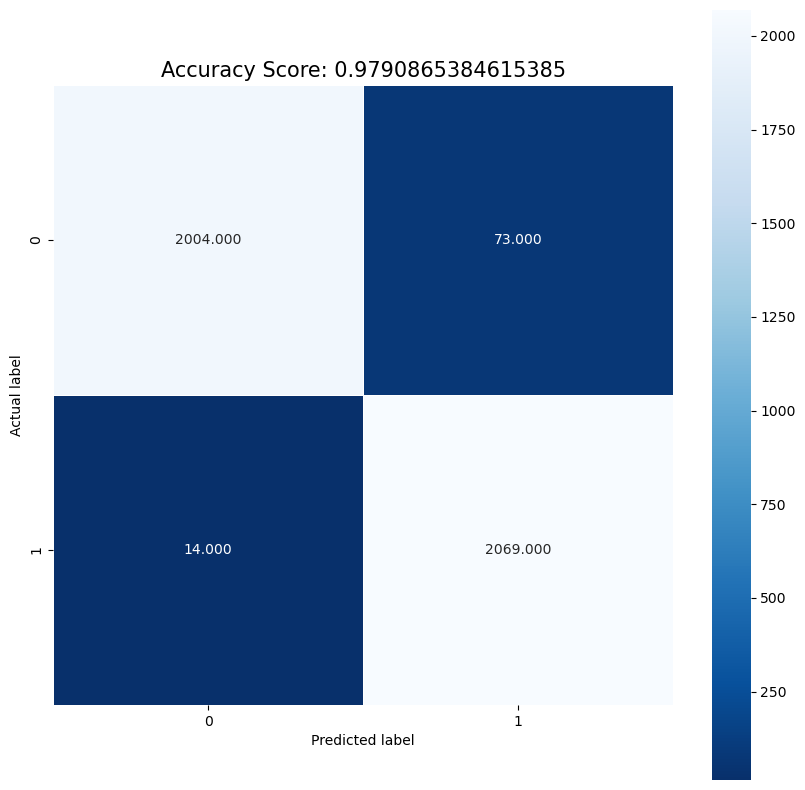

In [50]:
#plot a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(Y_test, X_test_prediction), annot=True, fmt='.3f', linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(test_data_accuracy)
plt.title(all_sample_title, size = 15)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


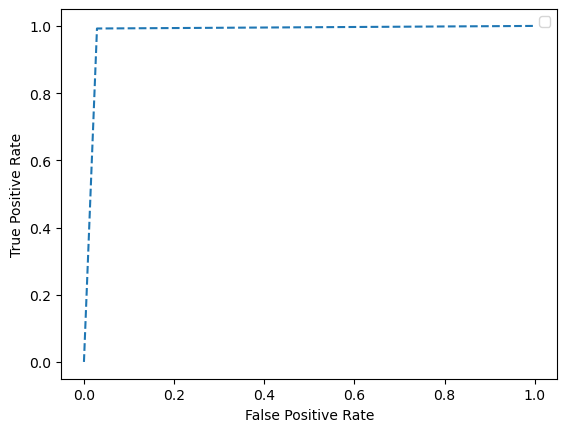

Logistic: ROC AUC=0.982


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


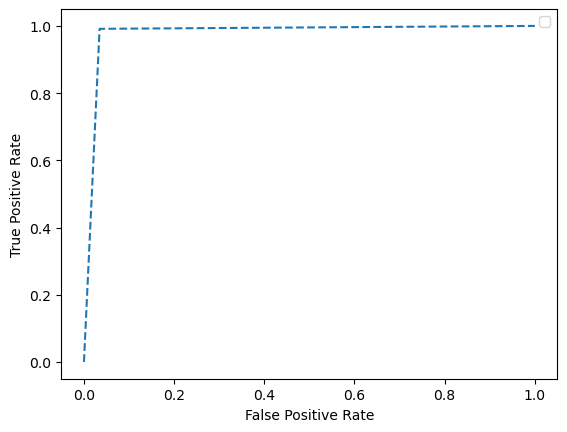

Logistic: ROC AUC=0.978


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


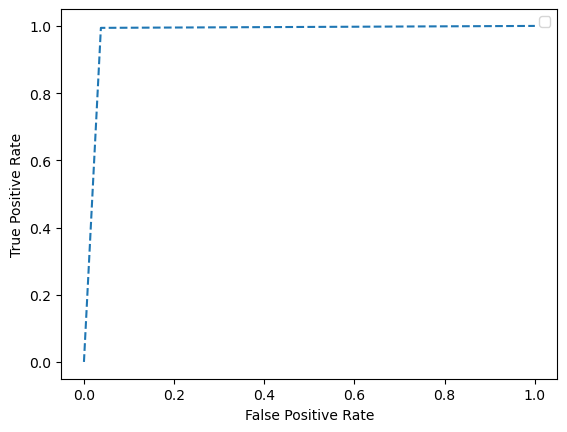

Logistic: ROC AUC=0.978


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


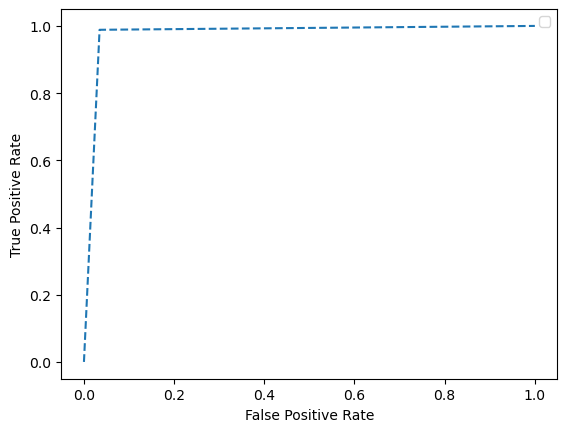

Logistic: ROC AUC=0.977


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


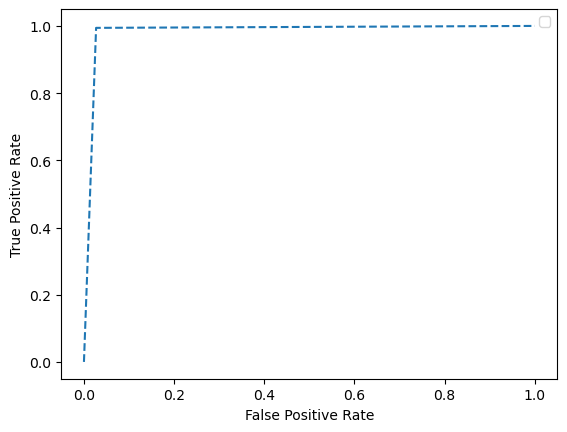

Logistic: ROC AUC=0.984


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


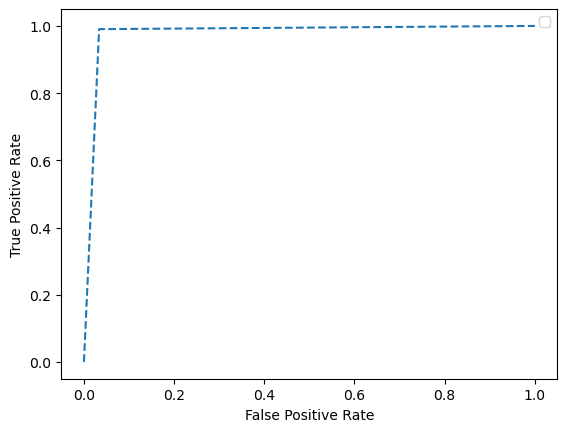

Logistic: ROC AUC=0.978


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


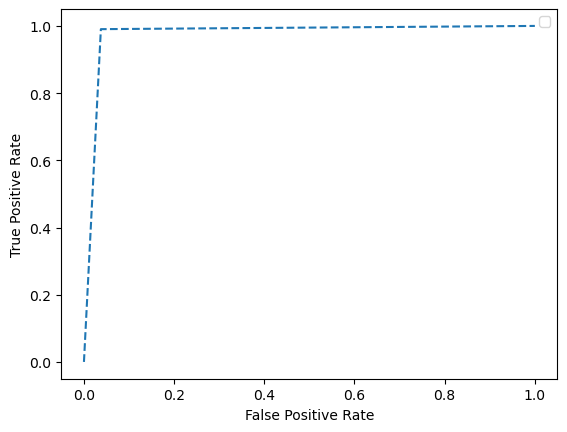

Logistic: ROC AUC=0.976


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


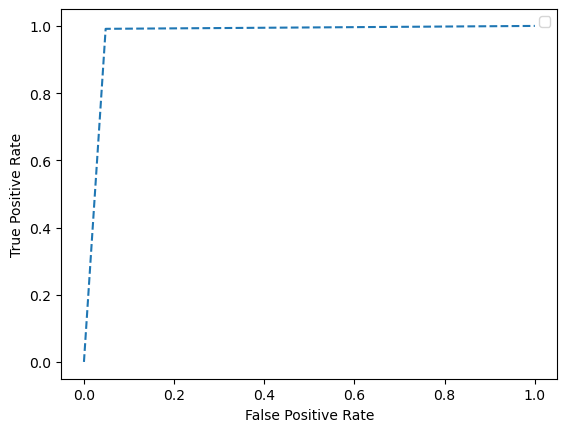

Logistic: ROC AUC=0.972


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


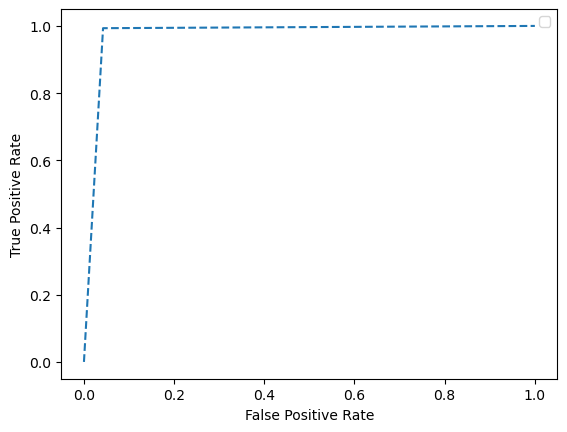

Logistic: ROC AUC=0.975


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


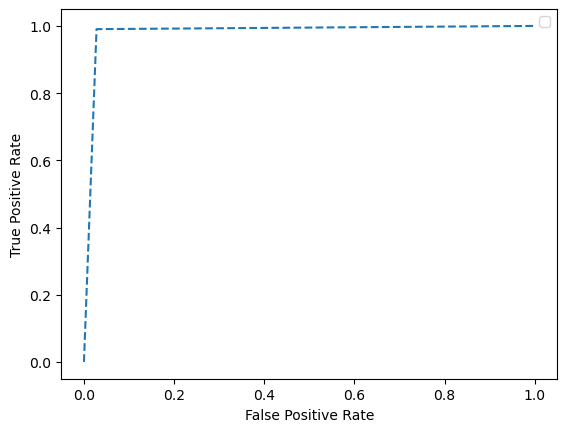

Logistic: ROC AUC=0.981


In [51]:
#plot a curve to show the accuracy score with the number of iterations
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# prepare cross validation
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# enumerate splits
for train_ix, test_ix in cv.split(X, Y):
    # split data
    X_train, X_test = X[train_ix], X[test_ix]
    Y_train, Y_test = Y[train_ix], Y[test_ix]
    # fit model
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    # evaluate model
    Yhat = model.predict(X_test)
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(Y_test, Yhat)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    # calculate scores
    
    ns_auc = roc_auc_score(Y_test, Yhat)
    # summarize scores
    print('Logistic: ROC AUC=%.3f' % (ns_auc))



In [54]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
  print(dataset['content'])
else:
  print('The news is Fake')

[1]
The news is Fake
